# Exploratory Data Analysis and Statistical Testing on Daily Data

In [16]:
# Data Analysis Libraries
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis Libraries
from statsmodels.tsa.stattools import adfuller
from scipy.stats import jarque_bera

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(
    action="ignore",
    module= "scipy",    
    message="^internal gelsd"
)
warnings.filterwarnings(
    action="ignore",
    module= "numpy",    
    message="^internal gelsd"
)

In [2]:
df = pd.read_csv('daily10.csv')

In [3]:
df.dropna(inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15130 entries, 0 to 15129
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    15130 non-null  object 
 1   DGS10   15130 non-null  float64
dtypes: float64(1), object(1)
memory usage: 354.6+ KB


In [5]:
df.columns = ['ds', 'y']
list(df.columns.values)

['ds', 'y']

In [6]:
df.describe()

,y
count,15130.000
mean,5.919
std,2.992
min,0.520
25%,3.900
50%,5.720
75%,7.670
max,15.840


In [7]:
df.head()

,ds,y
0,1962-01-02,4.060
1,1962-01-03,4.030
2,1962-01-04,3.990
3,1962-01-05,4.020
4,1962-01-08,4.030


In [8]:
df.tail()

,ds,y
15125,2022-07-25,2.810
15126,2022-07-26,2.810
15127,2022-07-27,2.780
15128,2022-07-28,2.680
15129,2022-07-29,2.670


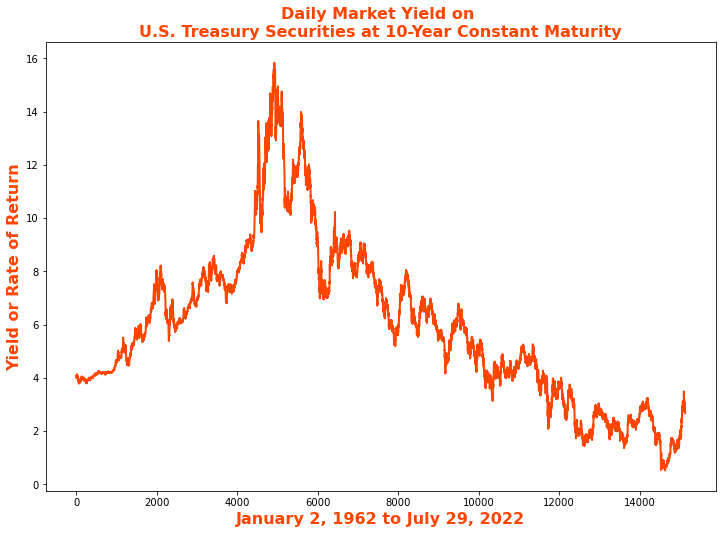

In [14]:
plt.plot(df['y'], linewidth=2, color='orangered')
plt.rcParams["figure.figsize"] = (12,8.25)
plt.ylabel('Yield or Rate of Return', fontweight='bold', fontsize = 16, color='orangered')
plt.xlabel('January 2, 1962 to July 29, 2022',fontweight='bold', fontsize = 16, color='orangered')
plt.title('Daily Market Yield on \nU.S. Treasury Securities at 10-Year Constant Maturity', fontweight='bold', fontsize = 16, color='orangered')
plt.show()

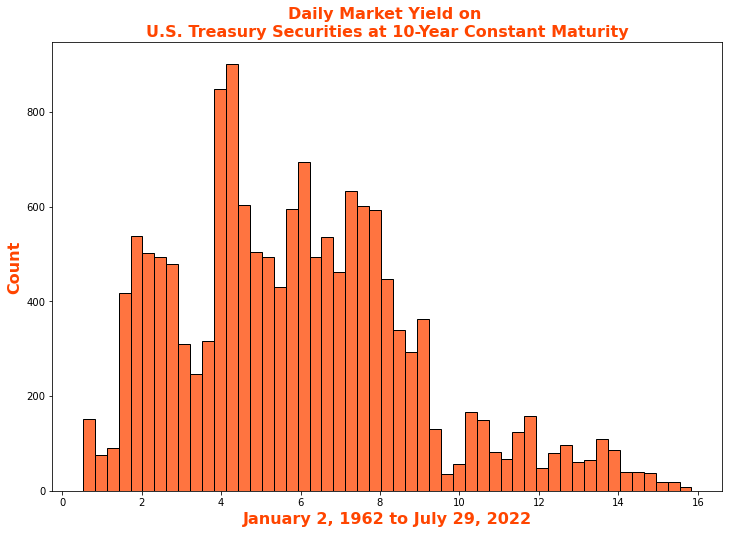

In [15]:
sns.histplot(df['y'], color = 'orangered')
plt.rcParams["figure.figsize"] = (12,8.25)
plt.ylabel('Count', fontweight='bold', fontsize = 16, color='orangered')
plt.xlabel('January 2, 1962 to July 29, 2022',fontweight='bold', fontsize = 16, color='orangered')
plt.title('Daily Market Yield on \nU.S. Treasury Securities at 10-Year Constant Maturity', fontweight='bold', fontsize = 16, color='orangered')
plt.show()

## Statistical Testing

### Test run for Stationarity

#### Is the first two moments of the distribution stable?

In [11]:
# test run for stationarity
result = adfuller(df['y'])

# print the results
print ('ADF Statistic: %f' % result[0])
print ('p-value: %f' % result[1])
print ('Critical Values:')

for key, value in result[4].items():
  print('\t%s: %.3f' % (key,value))

ADF Statistic: -1.536046
p-value: 0.515611
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


#### No, the first two moments of distribution are not stable because we fail to reject the null hypothesis as the p - value is greater than 0.05.

#### However, the ADF Statistic is close to zero and the cascade of critical values show that the non - stationary is not very strong.

#### There is some stable stationary parts of the dataset, but less than the non - stationary parts.

### Test run for Normality

#### Is the dataset normally distributed, and if not, then how far is it from a normal distribution?

In [12]:
# normality test
stat, p = jarque_bera(df['y'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=1120.389, p=0.000
Sample does not look Gaussian (reject H0)


In [13]:
df['y'].skew(), df['y'].kurt()

(0.657296272471849, 0.2227498311093825)

#### In a similar fashion to stationarity, the dataset is non - normal, but the JB statistic is far from zero.

#### There is some level of normality in the dataset as both the third and fourth moments of distribution are near zero.

#### Overall, taking the two tests above shows regime switching in the dataset as past behavior may differ from future behavior.